# 函数

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
 
def carry(state, theta):
	'''
	carry U operatior on state
	suppose U=exp(-i*theta/2*sigmay)
	'''
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])
	final_state = np.dot(U, state)

	return final_state

def blue_carry(state, theta):
	'''
	blue carry U on state
	suppose U=exp(-i*theta/2*sigmay)
	and |0>-->|1>,phonon number plus 1
	|1>-->|0>, phonon number minus 1
	'''
	# U operator on up and down level of state
	state_up = np.vstack((state[0], np.zeros(len(state[0]))))
	state_down = np.vstack((np.zeros(len(state[0])), state[1]))
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)], [np.sin(theta/2), np.cos(theta/2)]])
	carry_state_up = np.dot(U, state_up)
	carry_state_down = np.dot(U, state_down)
	# after U operation, down level minus 1
	up_state = carry_state_up[0]
	down_state_minus = carry_state_up[1]
	down_state_minus_0 = state_up[0][0]  # blue carry can not drive the phonon=0 && up level
	down_state_minus = np.delete(down_state_minus, 0)
	down_state_minus = np.insert(down_state_minus, len(down_state_minus)-1, 0)
	# after U operation, up level plus 1
	up_state_plus = carry_state_down[0]
	down_state = carry_state_down[1]
	up_state_plus = np.insert(up_state_plus, 0, down_state_minus_0)
	up_state_plus = np.delete(up_state_plus, len(up_state_plus)-1)
	# probability add up and down level
	up = up_state + up_state_plus
	down = down_state_minus + down_state
	final_state = np.vstack((up, down))

	return final_state

def red_carry(state, theta):
	'''
	red carry U on state
	suppose U=exp(-i*theta/2*sigmay)
	and |0>-->|1>,phonon number minus 1
	|1>-->|0>, phonon number plus 1
	'''
	# U operator on up and down level of state
	state_up = np.vstack((state[0], np.zeros(len(state[0]))))
	state_down = np.vstack((np.zeros(len(state[0])), state[1]))
	U = np.array([[np.cos(theta/2), -np.sin(theta/2)],[np.sin(theta/2), np.cos(theta/2)]])
	carry_state_up = np.dot(U, state_up)
	carry_state_down = np.dot(U, state_down)
	# after U operation, up level minus 1
	up_state_minus = carry_state_down[0]
	down_state = carry_state_down[1]
	up_state_minus_0 = state_down[1][0] # red carry can not drive the phonon=0 && down level
	up_state_minus = np.delete(up_state_minus,0)
	up_state_minus = np.insert(up_state_minus,len(up_state_minus)-1,0)
	# after U operation, down level plus 1
	up_state = carry_state_up[0]
	down_state_plus = carry_state_up[1]
	down_state_plus = np.insert(down_state_plus,0,up_state_minus_0)
	down_state_plus = np.delete(down_state_plus,len(down_state_plus)-1)
	# probability add up and down level
	up = up_state + up_state_minus
	down = down_state_plus + down_state
	final_state = np.vstack((up, down))

	return final_state

def Operator(up_state, down_state, func, theta):
	'''
	operator include carry, blue and red
	'''
	state = np.vstack((up_state, down_state))
	state = func(state, theta)

	return state[0], state[1]


def one_step_1(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	T2R2T1R1
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_1)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, red_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_2)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, blue_carry, np.pi)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def One_step_1(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	T2R2T1R1
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_1)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, red_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_2)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, blue_carry, np.pi)
	up_state[0] = - up_state[0]
	state = np.vstack((up_state, down_state, aux_state))
	return state

def one_step_2(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	T1R1T2R2
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_1)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def One_step_2(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	T1R1T2R2
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_1)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state[0] = - up_state[0]
	state = np.vstack((up_state, down_state, aux_state))
	return state

def one_step_3(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	r1T2R2T1r1   r1=sqrt(R1)
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_1/2)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, red_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_2)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, blue_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, theta_1/2)

	state = np.vstack((up_state, down_state, aux_state))
	return state

def One_step_3(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	r1T2R2T1r1   r1=sqrt(R1)
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_1/2)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, red_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_2)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, blue_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, theta_1/2)
	up_state[0] = - up_state[0]
	state = np.vstack((up_state, down_state, aux_state))
	return state

def One_step_4(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	r2T1R1T2r2  r2=sqrt(R2)
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_1)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state[0] = - up_state[0]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)
	state = np.vstack((up_state, down_state, aux_state))
	return state

def one_step_4(state, theta_1, theta_2):
	'''
	one step of complete quantum walk
	may with the help of auxiliary level
	input state of three level
	output state of three level
	T1:up-->right
	t2:down-->left 
	r2T1R1T2r2  r2=sqrt(R2)
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, theta_1)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, theta_2/2)
	
	state = np.vstack((up_state, down_state, aux_state))
	return state

def one_step_5(state, theta):
	'''
	conventional quantum walk with boundary
	'''
	up_state = state[0]
	down_state = state[1]
	aux_state = state[2]
	up_state, down_state = Operator(up_state, down_state, carry, theta)
	aux_state, down_state = Operator(aux_state, down_state, red_carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, carry, np.pi)
	up_state, down_state = Operator(up_state, down_state, blue_carry, np.pi)
	aux_state, down_state = Operator(aux_state, down_state, carry, np.pi)

	state = np.vstack([up_state, down_state, aux_state])
	return state


def N_step_1(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_1(state, theta_1, theta_2)
	return state

def N_step_2(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_2(state, theta_1, theta_2)
	return state

def N_step_3(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_3(state, theta_1, theta_2)
	return state

def N_step_4(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_4(state, theta_1, theta_2)
	return state

def N_STEP_2(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = One_step_2(state, theta_1, theta_2)
	return state

def N_STEP_4(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = One_step_4(state, theta_1, theta_2)
	return state

def N_STEP_1(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = One_step_1(state, theta_1, theta_2)
	return state

def N_STEP_3(state, theta_1, theta_2, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = One_step_3(state, theta_1, theta_2)
	return state

def N_step_5(state, theta, N):
	'''
	N step of complete quantum walk
	'''
	for i in range(N):
		state = one_step_5(state, theta)
	return state


# 随机行走模拟

In [40]:
M = 1000
n = 1
N = 500
p1 = np.zeros(801)
p2 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
# up_state[1] = 1/np.sqrt(2)
# down_state[0] = -1j/np.sqrt(2)
down_state[0] = 1
theta_2 = np.linspace(-2*np.pi,2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state1 = N_step_2(init_state, theta, theta_1, N=100)
    state2 = N_step_4(init_state, theta, theta_1, N=100)
    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    p1[i] = P1[0] + P1[1] 
    p2[i] = P2[0] + P2[1] 

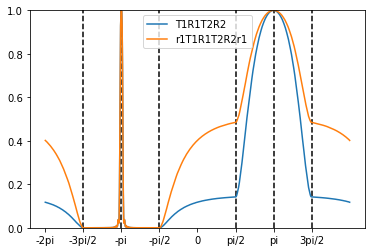

In [41]:
plt.plot(theta_2, p1, label='T1R1T2R2')
plt.plot(theta_2, p2, label='r1T1R1T2R2r1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

In [42]:
M = 1000
n = 1
N = 500
p3 = np.zeros(801)
p4 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0] = -1j/np.sqrt(2)
# down_state[0] = 1
theta_2 = np.linspace(-2*np.pi,2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state3 = N_step_2(init_state, theta, -theta_1, N=100)
    state4 = N_step_4(init_state, theta, -theta_1, N=100)
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
    p3[i] = P3[0] + P3[1] 
    p4[i] = P4[0] + P4[1] 

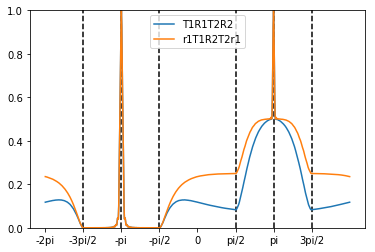

In [43]:
plt.plot(theta_2, p3, label='T1R1T2R2')
plt.plot(theta_2, p4, label='r1T1R2T2r1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

In [28]:
M = 1000
n = 1
N = 500
p1 = np.zeros(801)
p2 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
# up_state[1] = 1/np.sqrt(2)
# down_state[0] = -1j/np.sqrt(2)
down_state[0] = 1
theta_2 = np.linspace(-2*np.pi,2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state1 = N_step_2(init_state, theta_1, theta, N=100)
    state2 = N_step_4(init_state, theta_1, theta, N=100)
    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    p1[i] = P1[0] + P1[1] 
    p2[i] = P2[0] + P2[1] 

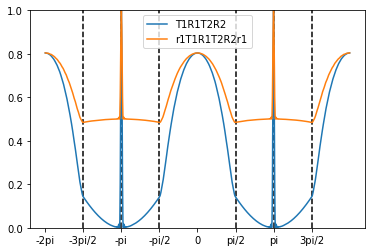

In [36]:
plt.savefig('4_11_1.jpg')
plt.plot(theta_2, p1, label='T1R1T2R2')
plt.plot(theta_2, p2, label='r1T1R1T2R2r1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

In [33]:
M = 1000
n = 1
N = 500
p3 = np.zeros(801)
p4 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0] = -1j/np.sqrt(2)
# down_state[0] = 1
theta_2 = np.linspace(-2*np.pi,2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state3 = N_step_2(init_state, -theta_1, theta, N=100)
    state4 = N_step_4(init_state, -theta_1, theta, N=100)
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
    p3[i] = P3[0] + P3[1] 
    p4[i] = P4[0] + P4[1] 

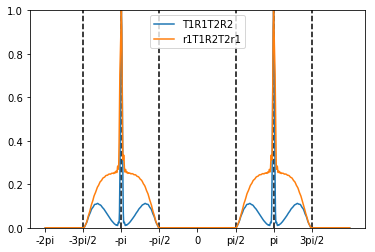

In [37]:
plt.savefig('4_11_2.jpg')
plt.plot(theta_2, p3, label='T1R1T2R2')
plt.plot(theta_2, p4, label='r1T1R2T2r1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

In [48]:
M = 1000
n = 1
N = 500
p_1 = np.zeros(801)
p_2 = np.zeros(801)
p_3 = np.zeros(801)
p_4 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0] = -1j/np.sqrt(2)
#down_state[0] = 1
theta_2 = np.linspace(-2*np.pi,2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state1 = N_step_1(init_state, theta_1, theta, N=100)
    state2 = N_step_3(init_state, theta_1, theta, N=100)
    state3 = N_step_1(init_state, -theta_1, theta, N=100)
    state4 = N_step_3(init_state, -theta_1, theta, N=100)
    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
    p_1[i] = P1[0] + P1[1] + P1[2]
    p_2[i] = P2[0] + P2[1] + P2[2]
    p_3[i] = P3[0] + P3[1] + P3[2]
    p_4[i] = P4[0] + P4[1] + P4[2]


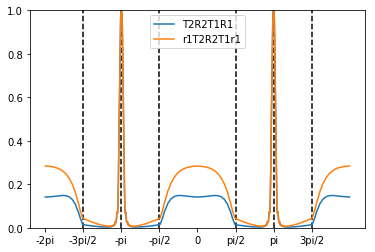

In [52]:
plt.plot(theta_2, p_1, label='T2R2T1R1')
plt.plot(theta_2, p_2, label='r1T2R2T1r1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

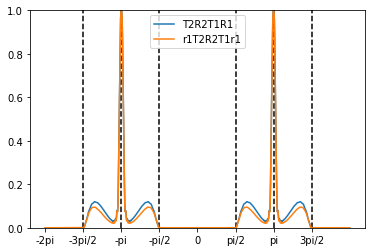

In [53]:
plt.plot(theta_2, p_3, label='T2R2T1R1')
plt.plot(theta_2, p_4, label='r1T2R2T1r1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

In [54]:
M = 1000
n = 1
N = 500
p_1 = np.zeros(801)
p_2 = np.zeros(801)
p_3 = np.zeros(801)
p_4 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0] = -1j/np.sqrt(2)
#down_state[0] = 1
theta_2 = np.linspace(-2*np.pi,2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state1 = N_step_1(init_state, theta, theta_1, N=100)
    state2 = N_step_3(init_state, theta, theta_1, N=100)
    state3 = N_step_1(init_state, theta, -theta_1, N=100)
    state4 = N_step_3(init_state, theta, -theta_1, N=100)
    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
    p_1[i] = P1[0] + P1[1] + P1[2]
    p_2[i] = P2[0] + P2[1] + P2[2]
    p_3[i] = P3[0] + P3[1] + P3[2]
    p_4[i] = P4[0] + P4[1] + P4[2]


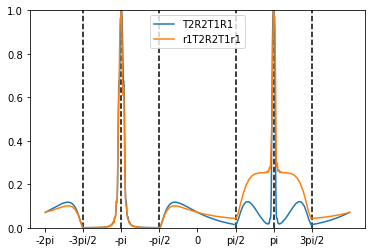

In [55]:
plt.plot(theta_2, p_1, label='T2R2T1R1')
plt.plot(theta_2, p_2, label='r1T2R2T1r1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

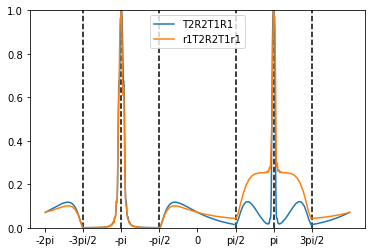

In [56]:
plt.plot(theta_2, p_3, label='T2R2T1R1')
plt.plot(theta_2, p_4, label='r1T2R2T1r1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

In [77]:
M = 1000
n = 1
N = 500
p1 = np.zeros(801)
p2 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0] = -1j/np.sqrt(2)
#down_state[0] = 1
theta_2 = np.linspace(-2*np.pi,2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

for i,theta in enumerate(theta_2):
    state1 = N_STEP_2(init_state, theta, theta_1, N=100)
    state2 = N_STEP_4(init_state, theta, theta_1, N=100)
    state3 = N_STEP_2(init_state, theta, -theta_1, N=100)
    state4 = N_STEP_4(init_state, theta, -theta_1, N=100)
    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
    p_1[i] = P1[0] + P1[1] + P1[2]
    p_2[i] = P2[0] + P2[1] + P2[2]
    p_3[i] = P3[0] + P3[1] + P3[2]
    p_4[i] = P4[0] + P4[1] + P4[2]


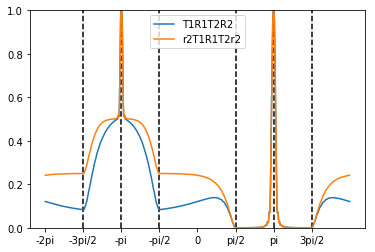

In [78]:
plt.plot(theta_2, p_1, label='T1R1T2R2')
plt.plot(theta_2, p_2, label='r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

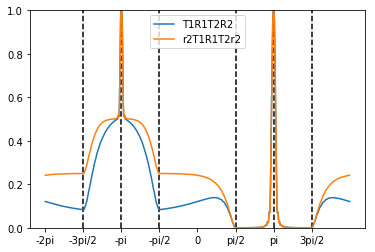

In [79]:
plt.plot(theta_2, p_3, label='T1R1T2R2')
plt.plot(theta_2, p_4, label='r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

In [80]:
M = 1000
n = 1
N = 500
P_1 = np.zeros(801)
P_2 = np.zeros(801)
P_3 = np.zeros(801)
P_4 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0] = -1j/np.sqrt(2)
#down_state[0] = 1
theta_2 = np.linspace(-2*np.pi,2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

for i,theta in enumerate(theta_2):
    state1 = N_STEP_2(init_state, theta_1, theta, N=100)
    state2 = N_STEP_4(init_state, theta_1, theta, N=100)
    state3 = N_STEP_2(init_state, -theta_1, theta, N=100)
    state4 = N_STEP_4(init_state, -theta_1, theta, N=100)
    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
    P_1[i] = P1[0] + P1[1] + P1[2]
    P_2[i] = P2[0] + P2[1] + P2[2]
    P_3[i] = P3[0] + P3[1] + P3[2]
    P_4[i] = P4[0] + P4[1] + P4[2]


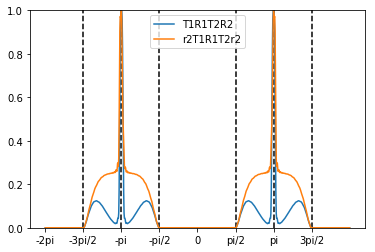

In [81]:
plt.plot(theta_2, P_1, label='T1R1T2R2')
plt.plot(theta_2, P_2, label='r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

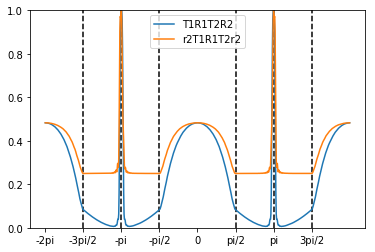

In [82]:
plt.plot(theta_2, P_3, label='T1R1T2R2')
plt.plot(theta_2, P_4, label='r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

In [68]:
M = 1000
n = 1
N = 500
pp_1 = np.zeros(801)
pp_2 = np.zeros(801)
pp_3 = np.zeros(801)
pp_4 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0] = -1j/np.sqrt(2)
#down_state[0] = 1
theta_2 = np.linspace(-2*np.pi,2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

for i,theta in enumerate(theta_2):
    state1 = N_STEP_1(init_state, theta, theta_1, N=100)
    state2 = N_STEP_3(init_state, theta, theta_1, N=100)
    state3 = N_STEP_1(init_state, theta, -theta_1, N=100)
    state4 = N_STEP_3(init_state, theta, -theta_1, N=100)
    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
    pp_1[i] = P1[0] + P1[1] + P1[2]
    pp_2[i] = P2[0] + P2[1] + P2[2]
    pp_3[i] = P3[0] + P3[1] + P3[2]
    pp_4[i] = P4[0] + P4[1] + P4[2]


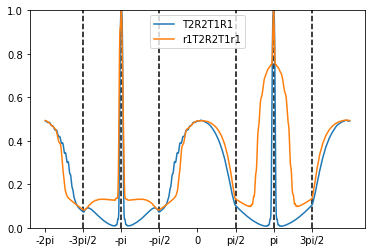

In [71]:
plt.plot(theta_2, pp_1, label='T2R2T1R1')
plt.plot(theta_2, pp_2, label='r1T2R2T1r1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

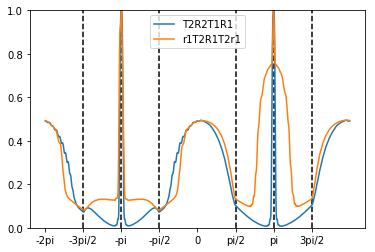

In [72]:
plt.plot(theta_2, pp_3, label='T2R2T1R1')
plt.plot(theta_2, pp_4, label='r1T2R1T2r1')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

In [73]:
M = 1000
n = 1
N = 500
pp_1 = np.zeros(801)
pp_2 = np.zeros(801)
pp_3 = np.zeros(801)
pp_4 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0] = -1j/np.sqrt(2)
#down_state[0] = 1
theta_2 = np.linspace(-2*np.pi,2*np.pi,801)
theta_1 = np.pi/2
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))

for i,theta in enumerate(theta_2):
    state1 = N_STEP_1(init_state, theta_1, theta, N=100)
    state2 = N_STEP_3(init_state, theta_1, theta, N=100)
    state3 = N_STEP_1(init_state, -theta_1, theta, N=100)
    state4 = N_STEP_3(init_state, -theta_1, -theta, N=100)
    P1 = abs(state1[0])**2 + abs(state1[1])**2 + abs(state1[2])**2
    P2 = abs(state2[0])**2 + abs(state2[1])**2 + abs(state2[2])**2
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
    pp_1[i] = P1[0] + P1[1] + P1[2]
    pp_2[i] = P2[0] + P2[1] + P2[2]
    pp_3[i] = P3[0] + P3[1] + P3[2]
    pp_4[i] = P4[0] + P4[1] + P4[2]


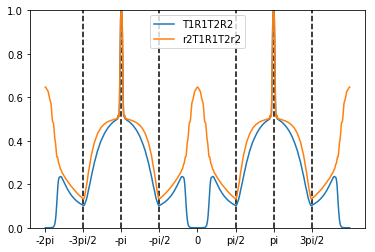

In [74]:
plt.plot(theta_2, pp_1, label='T1R1T2R2')
plt.plot(theta_2, pp_2, label='r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

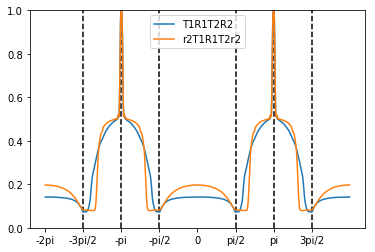

In [75]:
plt.plot(theta_2, pp_3, label='T1R1T2R2')
plt.plot(theta_2, pp_4, label='r2T1R1T2r2')
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi/2, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi/2, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

# 对实验可行性的预估

No handles with labels found to put in legend.


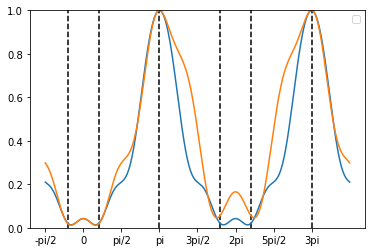

In [39]:
M = 1000
n = 1
N = 500
p3 = np.zeros(801)
p4 = np.zeros(801)
up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
up_state[1] = 1/np.sqrt(2)
down_state[0] = -1j/np.sqrt(2)
#down_state[0] = 1
theta_2 = np.linspace(-np.pi/2,7/2*np.pi,801)

theta_3 = 1*np.pi/5
np.array(up_state)
np.array(down_state)
np.array(aux_state)
init_state = np.vstack((up_state, down_state, aux_state))
for i,theta in enumerate(theta_2):
    state3 = N_step_2(init_state, -theta_3, theta, N=5)
    state4 = N_step_4(init_state, -theta_3, theta, N=5)
    P3 = abs(state3[0])**2 + abs(state3[1])**2 + abs(state3[2])**2
    P4 = abs(state4[0])**2 + abs(state4[1])**2 + abs(state4[2])**2
    p3[i] = P3[0] + P3[1] 
    p4[i] = P4[0] + P4[1] 
plt.plot(theta_2, p3,theta_2, p4)
plt.ylim(top = 1,bottom = 0)
my_x_ticks = np.arange(-np.pi/2,7/2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-pi/2','0','pi/2','pi','3pi/2','2pi','5pi/2','3pi'))
plt.vlines(np.pi/5, 0, 1, linestyles = "dashed")
plt.vlines(-np.pi/5, 0, 1, linestyles = "dashed")
plt.vlines(11*np.pi/5, 0, 1, linestyles = "dashed")
plt.vlines(9*np.pi/5, 0, 1, linestyles = "dashed")
plt.vlines(np.pi, 0, 1, linestyles = "dashed")
plt.vlines(3*np.pi, 0, 1, linestyles = "dashed")
plt.legend(loc='best') 

In [9]:
from ipywidgets import interact, interactive, fixed, interact_manual 
import ipywidgets as widgets 

import matplotlib.pyplot as plt 
%matplotlib inline 

import numpy as np 
M = 100
n = 1

up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
np.array(up_state)
np.array(down_state)
np.array(aux_state)
up_state[1] = 1/np.sqrt(2)
down_state[0] = -1j/np.sqrt(2)
init_state = np.vstack((up_state, down_state, aux_state))
def plot_func(n,theta_1,theta_2):
    n = int(n)
    P1 = np.zeros(n)
    P2 = np.zeros(n)
    for i in range(0,n):
        state = N_step_2(init_state, theta_1, theta_2, N=i)
        P1[i] = (abs(state[0])**2+abs(state[1])**2)[0]
        P2[i] = (abs(state[0])**2+abs(state[1])**2)[1]
    State = N_step_2(init_state, theta_1, theta_2, N=n)
    P = abs(State[0])**2+abs(State[1])**2
    phonon = np.arange(0,n) 
    p = np.arange(0,len(P)) 
    plt.bar(p, P)
    plt.plot(phonon ,P1 ,'+')
    plt.plot(phonon ,P1 )
    plt.plot(phonon ,P2 ,'*')
    plt.plot(phonon ,P2 )
    plt.xlim(0,40)
    plt.ylim(0,1)
interact(plot_func, n = widgets.FloatSlider(value=0, 
               min=0, 
               max=89, 
               step=1),theta_1=widgets.FloatSlider(value=3*np.pi/4, 
               min=-2*np.pi, 
               max=3*np.pi, 
               step=0.05*np.pi),theta_2=widgets.FloatSlider(value=np.pi/2, 
               min=-2*np.pi, 
               max=2*np.pi, 
               step=0.01)) 
plt.show()


interactive(children=(FloatSlider(value=0.0, description='n', max=89.0, step=1.0), FloatSlider(value=2.3561944…

# 实验可观察到的拓扑数

$r_{j}=\left\langle- 1, V\left|\hat{U}^{j}\right| 0, H\right\rangle$

$r(\varepsilon)=\sum_{j=1}^{t \rightarrow \infty} e^{i j \varepsilon} r_{j}$

In [56]:
import math
M = 100
n = 70

up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
np.array(up_state)
np.array(down_state)
np.array(aux_state)
up_state[1] = 1
r = np.zeros(n)
init_state = np.vstack((up_state, down_state, aux_state))

In [66]:
R1 = np.zeros(100) # 本征值为pi
R2 = np.zeros(100) # 本征值为0
theta = np.linspace(-2*np.pi,2*np.pi,100)
for j,t in enumerate(theta):
    for i in range(1,n+1):
        r[i-1] = N_step_2(init_state,-np.pi/2,t,i)[1][0]
        R1[j] = R1[j] + r[i-1]*math.pow(-1,i)
        R2[j] = R2[j] + r[i-1]
    R1[j] = 1/2 * R1[j]
    R2[j] = 1/2 * R2[j]


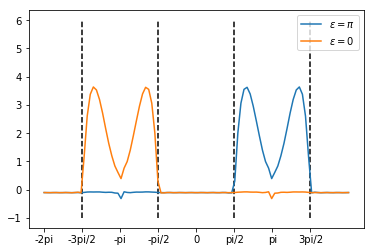

In [68]:
plt.plot(theta,R1,label='$\epsilon =\pi$')
plt.plot(theta,R2,label='$\epsilon =0$')
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, -1, 6, linestyles = "dashed")
plt.vlines(-np.pi/2, -1, 6, linestyles = "dashed")
plt.vlines(np.pi/2, -1, 6, linestyles = "dashed")
plt.vlines(3*np.pi/2, -1, 6, linestyles = "dashed")
plt.legend(loc='best') 

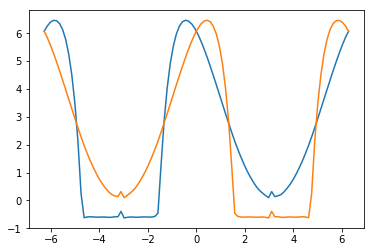

In [63]:
R1 = np.zeros(100) # 本征值为pi
R2 = np.zeros(100 ) # 本征值为0
theta = np.linspace(-2*np.pi,2*np.pi,100)
for j,t in enumerate(theta):
    for i in range(1,n+1):
        r[i-1] = N_step_2(init_state,np.pi/2,t,i)[1][0]
        R1[j] = R1[j] + r[i-1]*math.pow(-1,i)
        R2[j] = R2[j] + r[i-1]
    R1[j] = 1/2 * R1[j]
    R2[j] = 1/2 * R2[j]

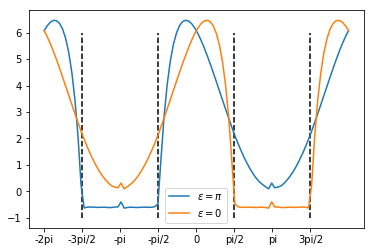

In [64]:
plt.plot(theta,R1,label='$\epsilon =\pi$')
plt.plot(theta,R2,label='$\epsilon =0$')
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, -1, 6, linestyles = "dashed")
plt.vlines(-np.pi/2, -1, 6, linestyles = "dashed")
plt.vlines(np.pi/2, -1, 6, linestyles = "dashed")
plt.vlines(3*np.pi/2, -1, 6, linestyles = "dashed")
plt.legend(loc='best') 

In [46]:
import math
M = 100
n = 50

up_state = [0]*M
down_state = [0]*M
aux_state = [0]*M
np.array(up_state)
np.array(down_state)
np.array(aux_state)
down_state[0] = 1
r = np.zeros(n)
init_state = np.vstack((up_state, down_state, aux_state))

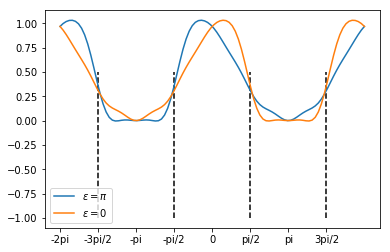

In [47]:
R1 = np.zeros(100) # 本征值为pi
R2 = np.zeros(100) # 本征值为0
theta = np.linspace(-2*np.pi,2*np.pi,100)
for j,t in enumerate(theta):
    for i in range(1,n+1):
        r[i-1] = N_step_2(init_state,np.pi/2,t,i)[0][0]
        R1[j] = R1[j] + r[i-1]*math.pow(-1,i)
        R2[j] = R2[j] + r[i-1]
    R1[j] = 1/2 * R1[j]
    R2[j] = 1/2 * R2[j]

In [ ]:
plt.plot(theta,R1,label='$\epsilon =\pi$')
plt.plot(theta,R2,label='$\epsilon =0$')
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, -1, 0.5, linestyles = "dashed")
plt.vlines(-np.pi/2, -1, 0.5, linestyles = "dashed")
plt.vlines(np.pi/2, -1, 0.5, linestyles = "dashed")
plt.vlines(3*np.pi/2, -1, 0.5, linestyles = "dashed")
plt.legend(loc='best') 

In [ ]:
R1 = np.zeros(100) # 本征值为pi
R2 = np.zeros(100) # 本征值为0
theta = np.linspace(-2*np.pi,2*np.pi,100)
for j,t in enumerate(theta):
    for i in range(1,n+1):
        r[i-1] = N_step_2(init_state,-np.pi/2,t,i)[0][0]
        R1[j] = R1[j] + r[i-1]*math.pow(-1,i)
        R2[j] = R2[j] + r[i-1]
    R1[j] = 1/2 * R1[j]
    R2[j] = 1/2 * R2[j]

In [ ]:
plt.plot(theta,R1,label='$\epsilon =\pi$')
plt.plot(theta,R2,label='$\epsilon =0$')
my_x_ticks = np.arange(-2*np.pi,2*np.pi,np.pi/2) 
plt.xticks(my_x_ticks,('-2pi','-3pi/2','-pi','-pi/2','0','pi/2','pi','3pi/2','2pi'))
plt.vlines(-3*np.pi/2, -1, 0.5, linestyles = "dashed")
plt.vlines(-np.pi/2, -1, 0.5, linestyles = "dashed")
plt.vlines(np.pi/2, -1, 0.5, linestyles = "dashed")
plt.vlines(3*np.pi/2, -1, 0.5, linestyles = "dashed")
plt.legend(loc='best') 